# Mobile Price Prediction

## Problem Statement:
Mobile phone manufacturers and retailers face the challenge of categorizing mobile phones into appropriate price ranges based on their features. Accurately predicting the price category of a mobile phone is crucial for effective marketing, pricing strategies, and inventory management. Mobile phone prices depend on a variety of features, including battery power, RAM, screen size, camera resolution, and technology support (such as 3G, 4G, and WiFi). By leveraging classification techniques, it is possible to predict the price range of a mobile device based on its specifications. This model can assist businesses and consumers in understanding the relationship between mobile features and their market value, aiding in better decision-making.

### Data Definition:
The mobile price classification dataset consists of 2000 records with 21 features that describe the characteristics of mobile phones. The dataset aims to classify mobile phones into one of four price ranges (0 to 3). Below is a definition of each feature:

**id:** Unique identifier for each mobile phone.

**battery_power:** Battery capacity of the phone (mAh).

**blue:** Bluetooth support (1 = Yes, 0 = No).

**clock_speed:** Speed at which the phone’s processor executes instructions (in GHz).

**dual_sim:** Support for dual SIM cards (1 = Yes, 0 = No).

**fc:** Front camera resolution (in megapixels).

**four_g:** 4G connectivity support (1 = Yes, 0 = No).

**int_memory:** Internal memory (in GB).

**m_dep:** Mobile depth (in cm).

**mobile_wt:** Weight of the mobile phone (in grams).

**n_cores:** Number of cores in the processor.

**pc:** Primary camera resolution (in megapixels).

**px_height:** Pixel height of the screen (in pixels).

**px_width:** Pixel width of the screen (in pixels).

**ram:** Random Access Memory (RAM) (in MB).

**sc_h:** Screen height (in cm).

**sc_w:** Screen width (in cm).

**talk_time:** Maximum talk time on a single charge (in hours).

**three_g:** 3G connectivity support (1 = Yes, 0 = No).

**touch_screen:** Touch screen support (1 = Yes, 0 = No).

**wifi:** WiFi connectivity support (1 = Yes, 0 = No).

**price_range:** Target variable indicating the price range (0 = low, 1 = medium, 2 = high, 3 = very high).

# Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Load and Check Data](#Read_Data)**
3. **[Descriptive Statistics](#data_understanding)**
    - 3.1 - [Numeric Statistics](#Summary_Statistics)
    - 3.2 - [Dimension](#Dimension)
4. **[Preprare and Analyze the Data](#data_preparation)**
    - 4.1 - [Understand The Dataset](#Data_Types)
    - 4.2 - [Manipulate The Dataset](#Missing_Values)
    - 4.3 - [Distribution Of Variables](#num1)
    - 4.4 - [Analyzing Relation With Independent Variables to Target Variables](#num2)
    - 4.5 - [Correlation](#corr)
5. **[Data Preprocessing](#data_preprocessing)**
    - 5.1 - [Standardization](#standard)
    - 5.2 - [MinMax Scaling](#minmax)
6. **[Assigning X and Y](#x&y)**
7. **[Train-Test-Split](#traintest)**
8. **[Model Training](#modeltrain)**
   - 8.1 - [Logistic Regression](#LogisticReg)
   - 8.2 - [Decision Tree](#DecisionTree)
   - 8.3 - [Random Forest](#RandomForest)
   - 8.4 - [Random Forest With Hyperparameter Tuning](#Random_Forest_with_grid_search)
   - 8.5 - [Adaboost With RandomForest Estimator](#AdaBoost)
   - 8.6 - [Adaboost With DecisionTree Estimator](#Adaboost_with_Decision_Tree)
9. **[Model Evaluation](#model_evaluation)**
10. **[Prediction Using Test Data](#data_validation)**
11. **[Conclusion and Interpretation of Model Evaluation](#conclusion)**

<a id='import_lib'></a>
### 1. Import Libraries

In [1]:
#Importing Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, cohen_kappa_score, roc_auc_score, f1_score, auc, roc_curve, confusion_matrix
sns.color_palette('tab10')
sns.color_palette('Set2')
sns.color_palette(palette='Purples_d')

[(0.6908419838523645, 0.681276432141484, 0.8306805074971164),
 (0.6028348071254646, 0.5807509932077406, 0.7775727284377804),
 (0.5172062027425349, 0.4829424580289632, 0.7259002947584262),
 (0.4335614507240805, 0.3989183647315135, 0.6268922209406638),
 (0.35642188901704475, 0.3332205561963347, 0.4859002947584262),
 (0.2771395617070358, 0.26569780853517877, 0.3409919261822376)]

<a id='Read_Data'></a>
### 2. Load and Check Data

In [2]:
#Read data
df = pd.read_csv('Mobile Price Classification.csv')
df.head(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,842,0,2.2,0,1,0,7,0.6,188,...,20,756,2549,9,7,19,0,0,1,1
1,2,1021,1,0.5,1,0,1,53,0.7,136,...,905,1988,2631,17,3,7,1,1,0,2
2,3,563,1,0.5,1,2,1,41,0.9,145,...,1263,1716,2603,11,2,9,1,1,0,2
3,4,615,1,2.5,0,0,0,10,0.8,131,...,1216,1786,2769,16,8,11,1,0,0,2
4,5,1821,1,1.2,0,13,1,44,0.6,141,...,1208,1212,1411,8,2,15,1,1,0,1
5,6,1859,0,0.5,1,3,0,22,0.7,164,...,1004,1654,1067,17,1,10,1,0,0,1
6,7,1821,0,1.7,0,4,1,10,0.8,139,...,381,1018,3220,13,8,18,1,0,1,3
7,8,1954,0,0.5,1,0,0,24,0.8,187,...,512,1149,700,16,3,5,1,1,1,0
8,9,1445,1,0.5,0,0,0,53,0.7,174,...,386,836,1099,17,1,20,1,0,0,0
9,10,509,1,0.6,1,2,1,9,0.1,93,...,1137,1224,513,19,10,12,1,0,0,0


In [3]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2000 non-null   int64  
 1   battery_power  2000 non-null   int64  
 2   blue           2000 non-null   int64  
 3   clock_speed    2000 non-null   float64
 4   dual_sim       2000 non-null   int64  
 5   fc             2000 non-null   int64  
 6   four_g         2000 non-null   int64  
 7   int_memory     2000 non-null   int64  
 8   m_dep          2000 non-null   float64
 9   mobile_wt      2000 non-null   int64  
 10  n_cores        2000 non-null   int64  
 11  pc             2000 non-null   int64  
 12  px_height      2000 non-null   int64  
 13  px_width       2000 non-null   int64  
 14  ram            2000 non-null   int64  
 15  sc_h           2000 non-null   int64  
 16  sc_w           2000 non-null   int64  
 17  talk_time      2000 non-null   int64  
 18  three_g 

<a id='data_understanding'></a>
### 3. Descriptive Statistics

<a id='Summary_Statistics'></a>
#### 3.1 Numerical Statistics

In [4]:
#Numerical Statistics
print(df.describe())

                id  battery_power       blue  clock_speed     dual_sim  \
count  2000.000000    2000.000000  2000.0000  2000.000000  2000.000000   
mean   1000.500000    1238.518500     0.4950     1.522250     0.509500   
std     577.494589     439.418206     0.5001     0.816004     0.500035   
min       1.000000     501.000000     0.0000     0.500000     0.000000   
25%     500.750000     851.750000     0.0000     0.700000     0.000000   
50%    1000.500000    1226.000000     0.0000     1.500000     1.000000   
75%    1500.250000    1615.250000     1.0000     2.200000     1.000000   
max    2000.000000    1998.000000     1.0000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep    mobile_wt  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      4.309500     0.521500    32.046500     0.501750   140.249000  ...   
std       4.341444     0.499662    18.145715     0.288416    35.399655  ...   
min       0.00000

<a id='Dimension'></a>
#### 3.2 Dimension

In [5]:
#Dimension
df.shape

(2000, 22)

<a id='data_preparation'></a>
### 4. Preprare and Analyze the Data

<a id='Data_Types'></a>
#### 4.1 Understand The Dataset

In [6]:
#Checking Dtypes
df.dtypes

id                 int64
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

<a id='Missing_Values'></a>
#### 4.2 Manipulate The Dataset

In [7]:
#Checking the Misssing Values
df.isnull().sum().sort_values(ascending=False)

id               0
battery_power    0
wifi             0
touch_screen     0
three_g          0
talk_time        0
sc_w             0
sc_h             0
ram              0
px_width         0
px_height        0
pc               0
n_cores          0
mobile_wt        0
m_dep            0
int_memory       0
four_g           0
fc               0
dual_sim         0
clock_speed      0
blue             0
price_range      0
dtype: int64

In [8]:
#Removing ID Column
df.drop('id', axis=1, inplace=True)

In [9]:
#Rechecking The Shape
df.shape

(2000, 21)

<a id='num1'></a>
#### 4.3 Distribution Of Variables

In [10]:
#Adding Column of Price Range in Categories
price_range_mapping = {0: 'low', 1: 'medium', 2: 'high', 3: 'very high'}
df['price_category'] = df['price_range'].map(price_range_mapping)
df.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price_category
0,842,0,2.2,0,1,0,7,0.6,188,2,...,756,2549,9,7,19,0,0,1,1,medium
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,1988,2631,17,3,7,1,1,0,2,high


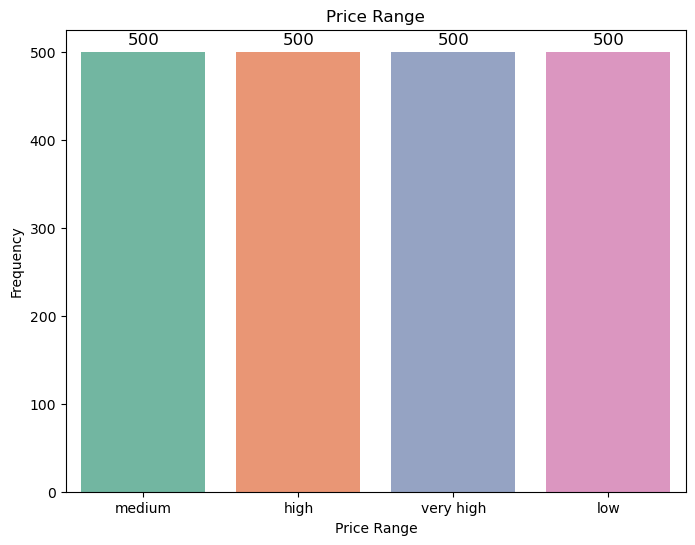

In [11]:
#Count Plot of Target Variables (Price Range)
plt.figure(figsize=(8,6))
ax=sns.countplot(x='price_category', data=df, palette='Set2')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
            
plt.title('Price Range')
plt.xlabel('Price Range')
plt.ylabel('Frequency')
plt.show()

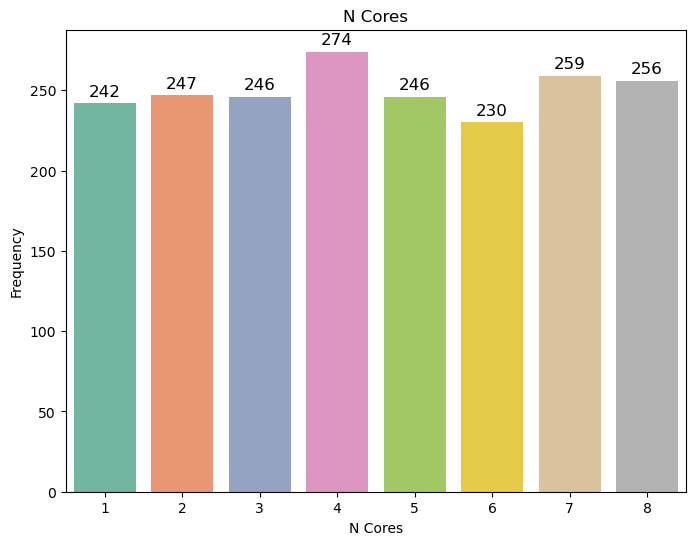

In [12]:
#Count Plot of 'N_Cores'
plt.figure(figsize=(8,6))
ax=sns.countplot(x='n_cores', data=df, palette='Set2')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
            
plt.title('N Cores')
plt.xlabel('N Cores')
plt.ylabel('Frequency')
plt.show()

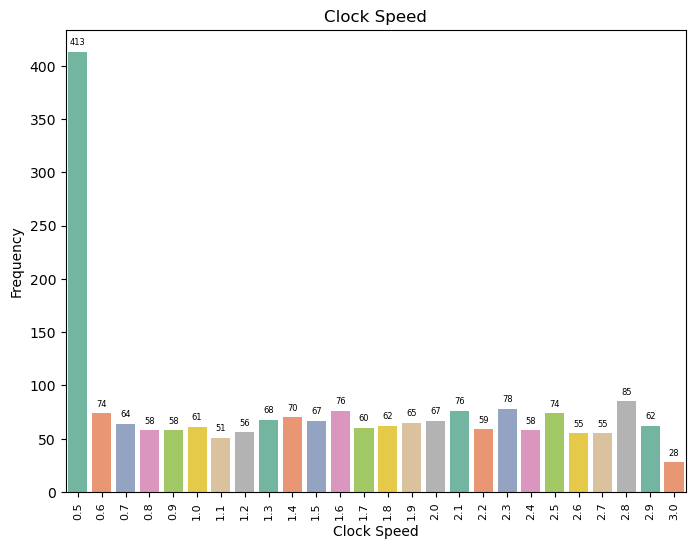

In [13]:
#Count Plot of 'Clock Speed'
plt.figure(figsize=(8,6))
ax=sns.countplot(x='clock_speed', data=df, palette='Set2')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=6, color='black', xytext=(0, 5),
                textcoords='offset points')
            
plt.title('Clock Speed')
plt.xlabel('Clock Speed')
plt.xticks(rotation=90, fontsize=8)
plt.ylabel('Frequency')
plt.show()

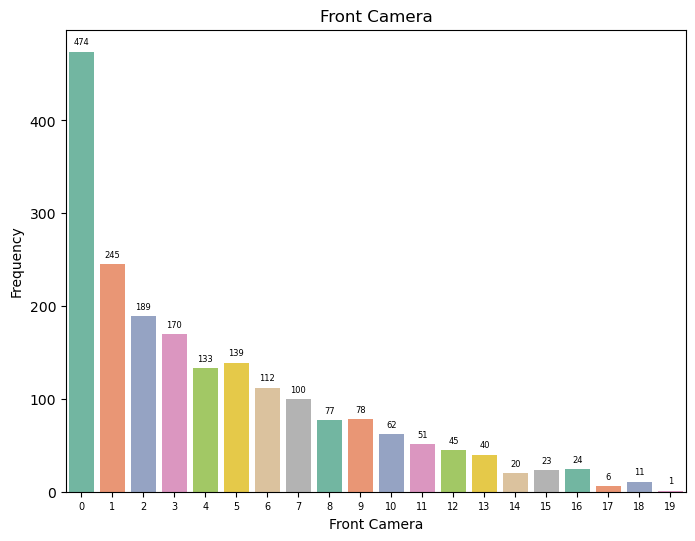

In [14]:
#Count Plot of 'Front Camera'
plt.figure(figsize=(8,6))
ax=sns.countplot(x='fc', data=df, palette='Set2')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=6, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Front Camera')
plt.xlabel('Front Camera')
plt.xticks(fontsize=7)
plt.ylabel('Frequency')
plt.show()

In [15]:
#Value Count for 'Bluetooth'
df['blue'].value_counts()

blue
0    1010
1     990
Name: count, dtype: int64

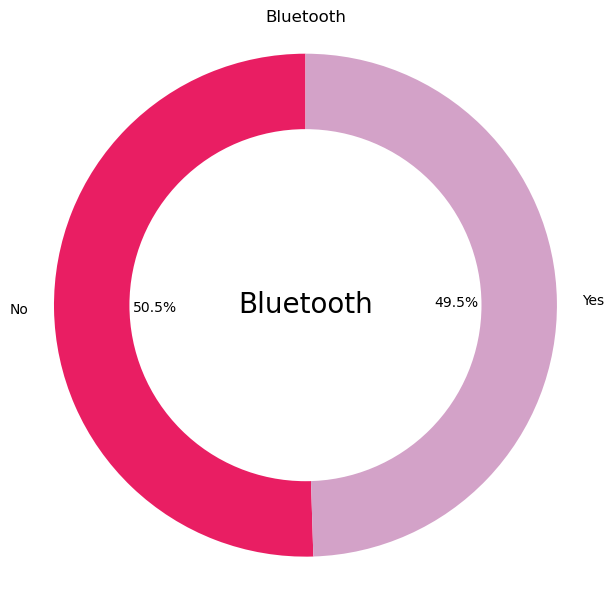

In [16]:
#Count Plot for 'Bluetooth'
label = ['No', 'Yes']

plt.figure(figsize=(6, 6))
plt.pie(df['blue'].value_counts(), labels=label, autopct='%1.1f%%', startangle=90, colors=['#E91E63', '#D3A2C8'], textprops={'color': 'black'}, wedgeprops={'linewidth': 7})

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.text(0, 0, 'Bluetooth', horizontalalignment='center', verticalalignment='center', fontsize=20, color='black')

plt.title('Bluetooth')
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [17]:
#Value Count for 'Dual Sim'
df['dual_sim'].value_counts()

dual_sim
1    1019
0     981
Name: count, dtype: int64

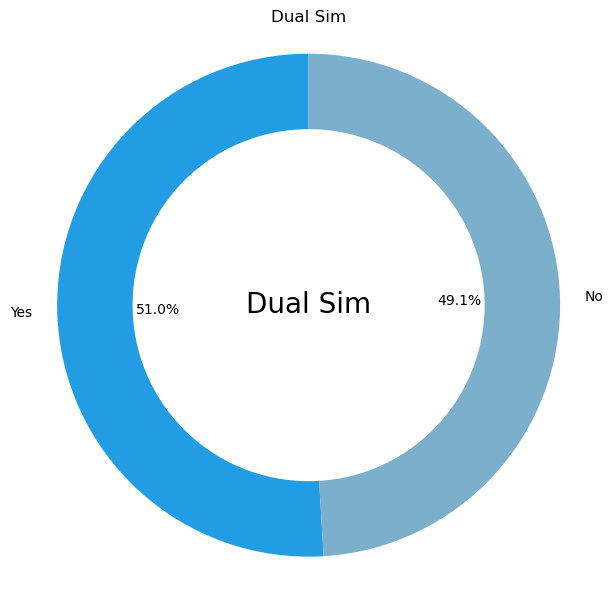

In [18]:
#Count Plot for 'Dual Sim'
label = ['Yes', 'No']

plt.figure(figsize=(6, 6))
plt.pie(df['dual_sim'].value_counts(), labels=label, autopct='%1.1f%%', startangle=90, colors=['#229CE2', '#7CAFCC'], textprops={'color': 'black'}, wedgeprops={'linewidth': 7})

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.text(0, 0, 'Dual Sim', horizontalalignment='center', verticalalignment='center', fontsize=20, color='black')

plt.title('Dual Sim')
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [19]:
#Value Count for 'Wifi'
df['wifi'].value_counts()

wifi
1    1014
0     986
Name: count, dtype: int64

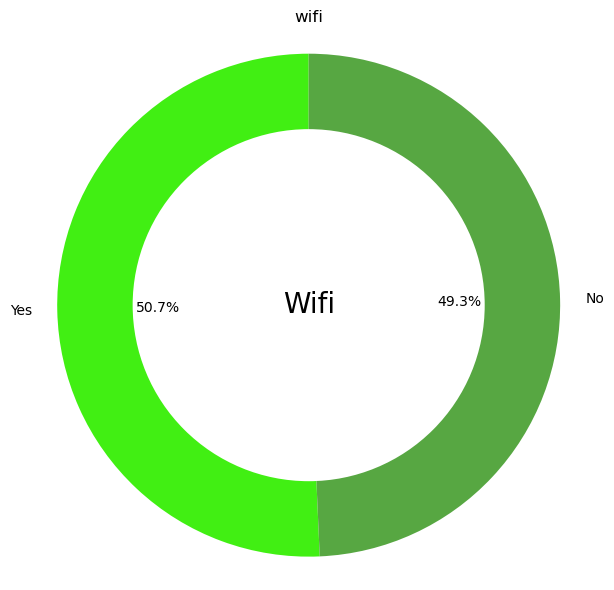

In [20]:
#Count Plot for 'Wifi'
label = ['Yes', 'No']

plt.figure(figsize=(6, 6))
plt.pie(df['wifi'].value_counts(), labels=label, autopct='%1.1f%%', startangle=90, colors=['#41EF13', '#57A742'], textprops={'color': 'black'}, wedgeprops={'linewidth': 7})

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.text(0, 0, 'Wifi', horizontalalignment='center', verticalalignment='center', fontsize=20, color='black')

plt.title('wifi')
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [21]:
#Value Count for 'Four-G'
df['four_g'].value_counts()

four_g
1    1043
0     957
Name: count, dtype: int64

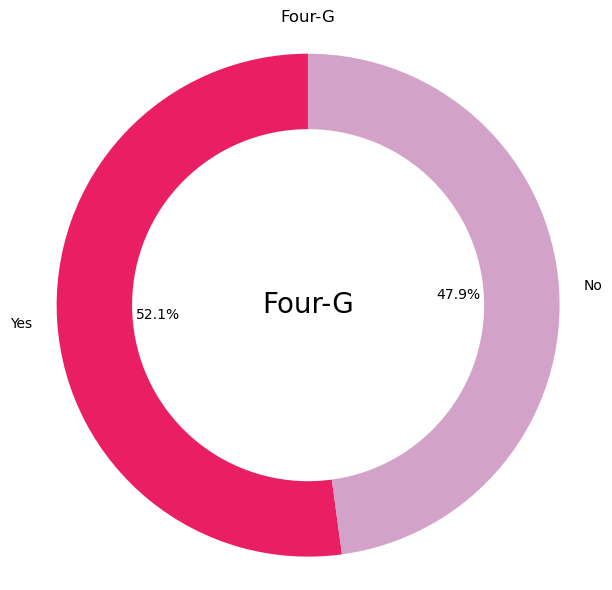

In [22]:
#Count Plot for 'Four-G'
label = ['Yes', 'No']

plt.figure(figsize=(6, 6))
plt.pie(df['four_g'].value_counts(), labels=label, autopct='%1.1f%%', startangle=90, colors=['#E91E63', '#D3A2C8'], textprops={'color': 'black'}, wedgeprops={'linewidth': 7})

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.text(0, 0, 'Four-G', horizontalalignment='center', verticalalignment='center', fontsize=20, color='black')

plt.title('Four-G')
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [23]:
#Value Count for 'Three-G'
df['three_g'].value_counts()

three_g
1    1523
0     477
Name: count, dtype: int64

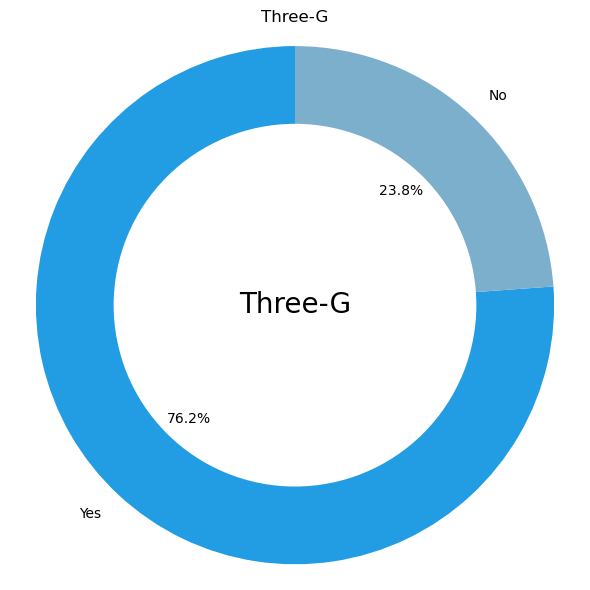

In [24]:
#Count Plot for 'Three-G'
label = ['Yes', 'No']

plt.figure(figsize=(6, 6))
plt.pie(df['three_g'].value_counts(), labels=label, autopct='%1.1f%%', startangle=90, colors=['#229CE2', '#7CAFCC'], textprops={'color': 'black'}, wedgeprops={'linewidth': 7})

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.text(0, 0, 'Three-G', horizontalalignment='center', verticalalignment='center', fontsize=20, color='black')

plt.title('Three-G')
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [25]:
#Value Count for 'Touch Screen'
df['touch_screen'].value_counts()

touch_screen
1    1006
0     994
Name: count, dtype: int64

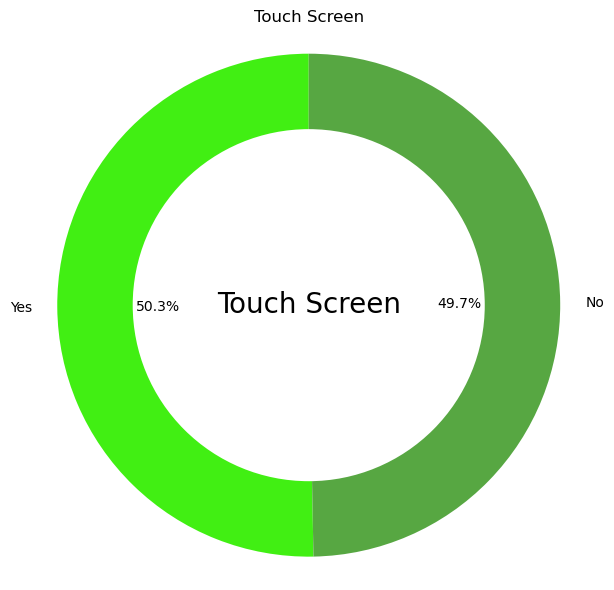

In [26]:
#Count Plot for 'Touch Screen'
label = ['Yes', 'No']

plt.figure(figsize=(6, 6))
plt.pie(df['touch_screen'].value_counts(), labels=label, autopct='%1.1f%%', startangle=90, colors=['#41EF13', '#57A742'], textprops={'color': 'black'}, wedgeprops={'linewidth': 7})

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.text(0, 0, 'Touch Screen', horizontalalignment='center', verticalalignment='center', fontsize=20, color='black')

plt.title('Touch Screen')
plt.axis('equal')  
plt.tight_layout()
plt.show()

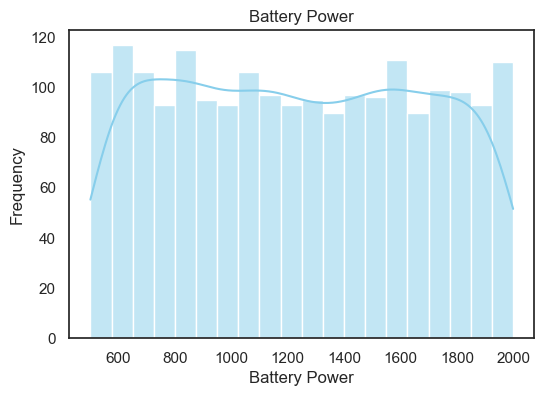

In [27]:
#Count Plot For 'Battery power'
sns.set(style='white')
plt.figure(figsize=(6,4))
sns.histplot(df['battery_power'], kde=True, color='skyblue', bins=20)
plt.title('Battery Power')
plt.xlabel('Battery Power')
plt.ylabel('Frequency')
plt.show()

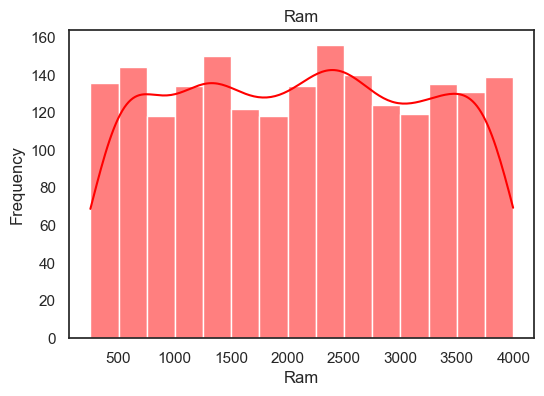

In [28]:
#Count Plot For 'Ram'
sns.set(style='white')
plt.figure(figsize=(6,4))
sns.histplot(df['ram'], kde=True, color='red', bins=15)
plt.title('Ram')
plt.xlabel('Ram')
plt.ylabel('Frequency')
plt.show()

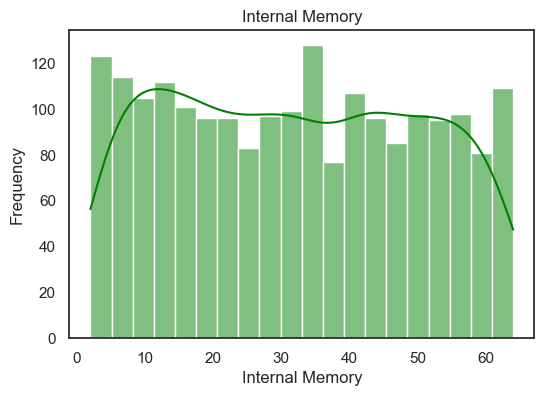

In [29]:
#Count Plot For 'Internal Memory'
sns.set(style='white')
plt.figure(figsize=(6,4))
sns.histplot(df['int_memory'], kde=True, color='green', bins=20)
plt.title('Internal Memory')
plt.xlabel('Internal Memory')
plt.ylabel('Frequency')
plt.show()

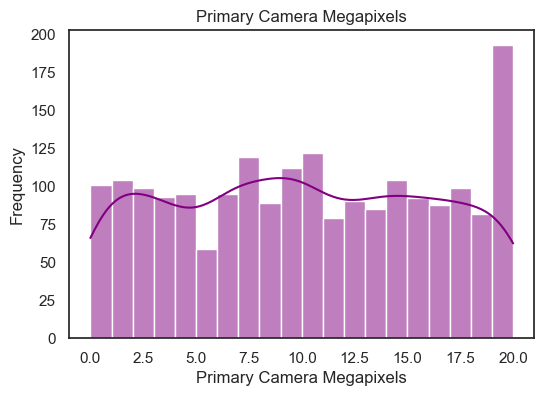

In [30]:
#Count Plot For 'Primary Camera Megapixels'
sns.set(style='white')
plt.figure(figsize=(6,4))
sns.histplot(df['pc'], kde=True, color='purple', bins=20)
plt.title('Primary Camera Megapixels')
plt.xlabel('Primary Camera Megapixels')
plt.ylabel('Frequency')
plt.show()

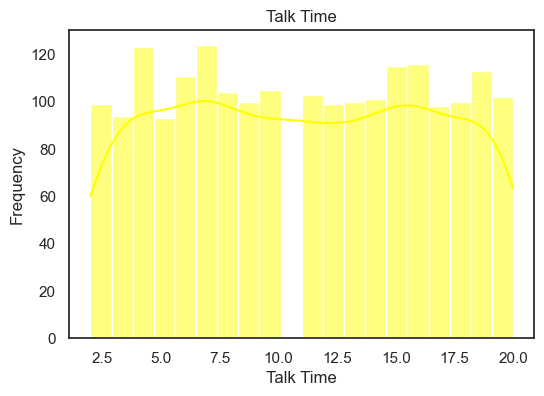

In [31]:
#Count Plot For 'Talk Time'
sns.set(style='white')
plt.figure(figsize=(6,4))
sns.histplot(df['talk_time'], kde=True, color='yellow', bins=20)
plt.title('Talk Time')
plt.xlabel('Talk Time')
plt.ylabel('Frequency')
plt.show()

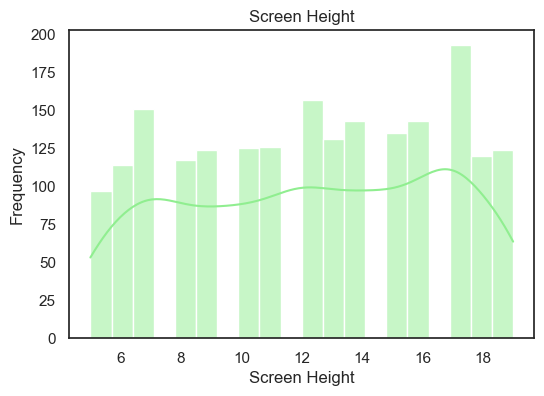

In [32]:
#Count Plot For 'Screen Height'
sns.set(style='white')
plt.figure(figsize=(6,4))
sns.histplot(df['sc_h'], kde=True, color='lightgreen', bins=20)
plt.title('Screen Height')
plt.xlabel('Screen Height')
plt.ylabel('Frequency')
plt.show()

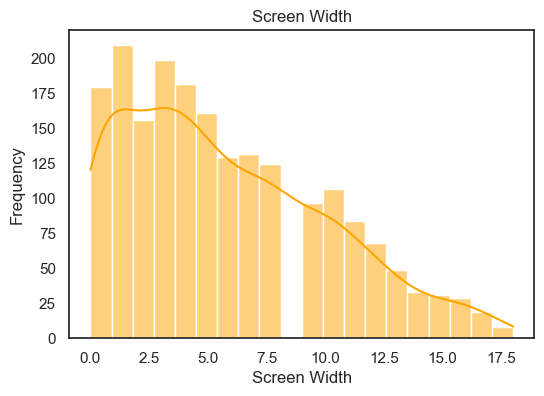

In [33]:
#Count Plot For 'Screen Width'
sns.set(style='white')
plt.figure(figsize=(6,4))
sns.histplot(df['sc_w'], kde=True, color='orange', bins=20)
plt.title('Screen Width')
plt.xlabel('Screen Width')
plt.ylabel('Frequency')
plt.show()

##### Observation:

Key observations about the distribution of these features, such as skewness or multimodal distributions, which can guide us in selecting the right preprocessing techniques (e.g., scaling or normalization).

<a id='num2'></a>
#### 4.4 Analyzing Relation With Independent Variables to Target Variables

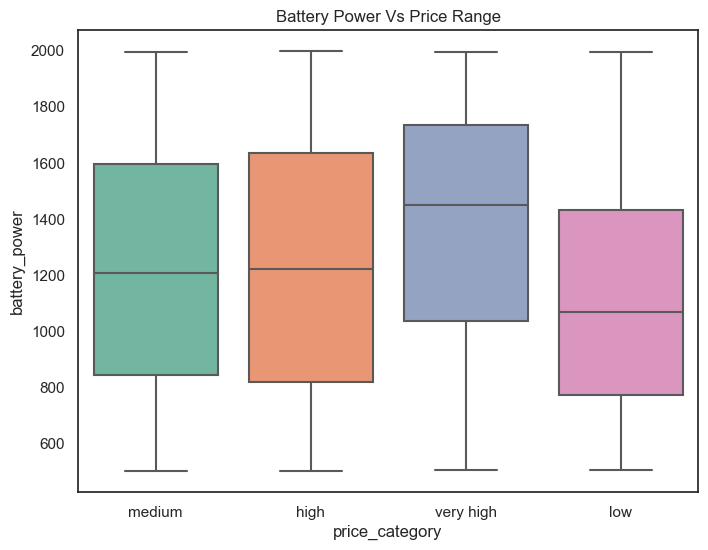

In [34]:
#Battery Power - Price Range
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_category', y='battery_power', data=df, palette='Set2')
plt.title('Battery Power Vs Price Range')
plt.show()

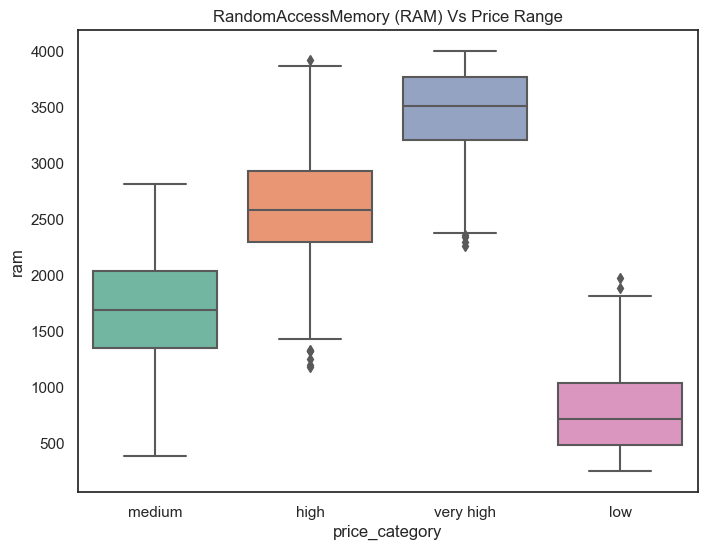

In [35]:
#Ram - Price Range
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_category', y='ram', data=df, palette='Set2')
plt.title('RandomAccessMemory (RAM) Vs Price Range')
plt.show()

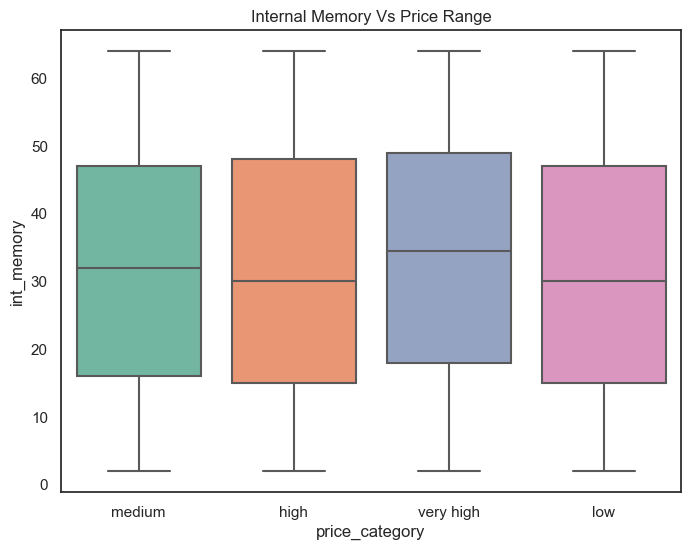

In [36]:
#Internal Memory - Price Range
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_category', y='int_memory', data=df, palette='Set2')
plt.title('Internal Memory Vs Price Range')
plt.show()

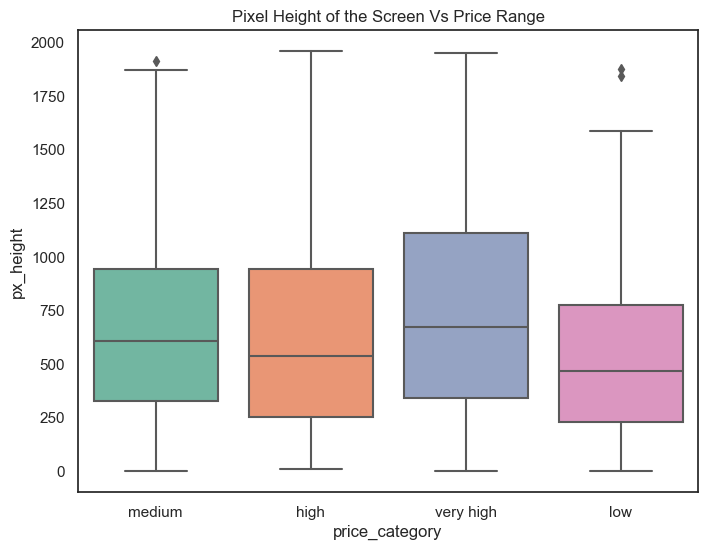

In [37]:
#Phone Height - Price Range
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_category', y='px_height', data=df, palette='Set2')
plt.title('Pixel Height of the Screen Vs Price Range')
plt.show()

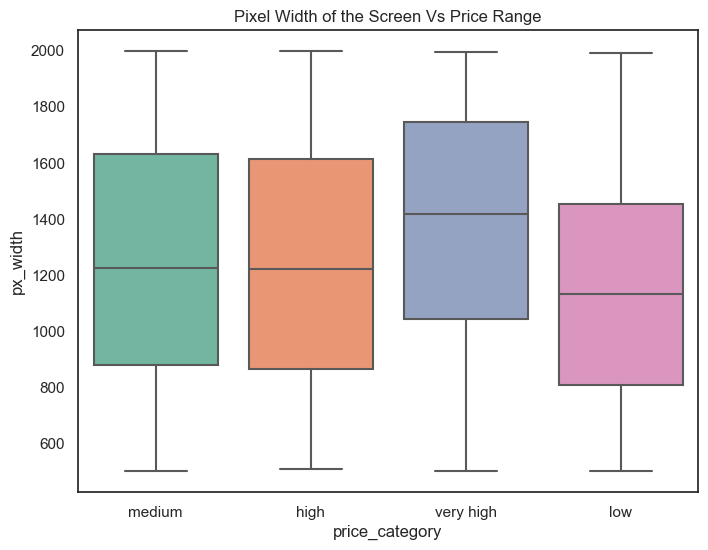

In [38]:
#Phone Width - Price Range
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_category', y='px_width', data=df, palette='Set2')
plt.title('Pixel Width of the Screen Vs Price Range')
plt.show()

##### Observation:

The box plots provide insights into how different mobile phone features correlate with price categories:

1. **Battery Power vs Price Category:**
   -  Higher price categories, such as medium and high, tend to have mobile phones with higher median battery power.
   -  The lowest price category (low) generally has phones with lower battery capacities.
     
         
2. **RAM vs Price Category:**
   -  RAM shows a clear upward trend with price. Higher-priced phones (very high and high) have significantly more RAM, indicating a strong correlation between RAM and price.
   -  Phones in the low price category have noticeably lower RAM compared to others.
     

3. **Internal Memory Vs Price Category:**
   - Internal memory appears to be relatively consistent across all price ranges, suggesting that other features may play a more significant role in determining the price of mobile phones.
     
   
5. **Pixel Height and Pixel Width vs Price Category:**
   - There is no distinct trend between pixel height/width and price categories. All price categories seem to have a wide range of pixel resolutions, suggesting other factors may be more significant for price determination.
     

Overall, features such as battery power and RAM show clear relationships with price categories, while internal memory and pixel dimensions appear to have a weaker or less consistent correlation with price.

<a id='corr'></a>
#### 4.5 Correlation

In [39]:
#Dropping Price Category column
df.drop('price_category', axis=1, inplace=True)

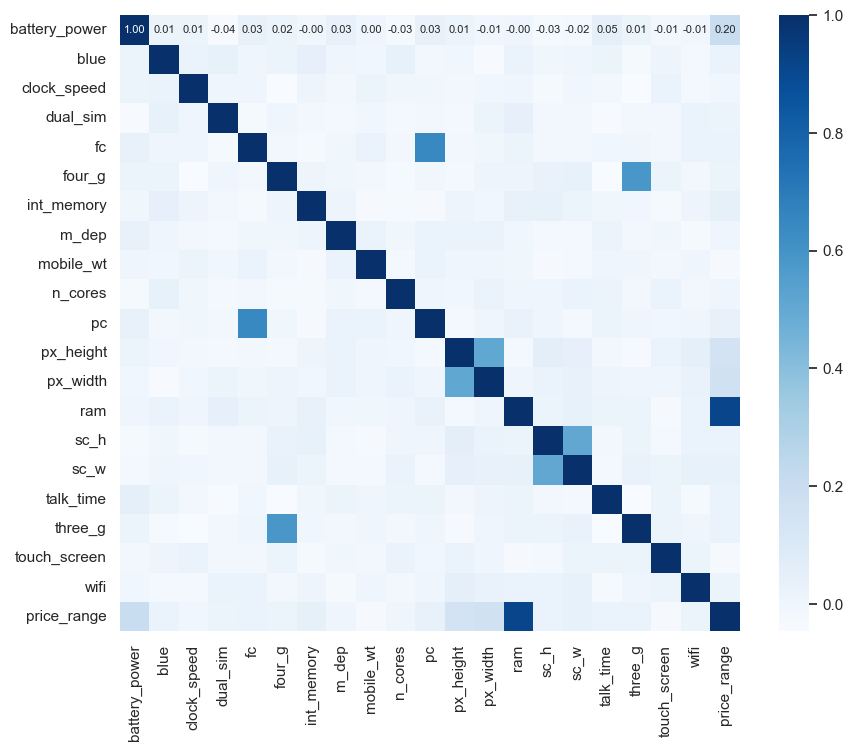

In [40]:
#Correlation Heatmap 
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', annot_kws={"size": 8}, fmt=".2f")
plt.show()

##### Observation:
The correlation heatmap reveals several important relationships between the features and the target variable price_range. Key insights include:

1. RAM has a strong positive correlation with price_range, meaning higher RAM is likely associated with higher price categories.

2. Battery power and pixel resolution (width and height) also show positive correlations with the price range, indicating their influence on pricing.

3. Other features like internal memory, primary camera (pc), and number of cores (n_cores) exhibit moderate correlations with price_range

<a id='data_preprocessing'></a>
### 5. Preprocessing

In [41]:
#Segregation of Binary Column for Dataframe
df_binary = df.drop(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range'], axis=1)

<a id='standard'></a>
#### 5.1 Standardization

Apply these methods to numerical features like battery_power, int_memory, ram, etc.

In [42]:
#Standardization
sc = StandardScaler()
df_scaled = pd.DataFrame(sc.fit_transform(df[['battery_power', 'clock_speed', 'fc', 'int_memory', 'n_cores', 'pc', 'ram', 'talk_time']]), columns=['battery_power', 'clock_speed', 'fc', 'int_memory', 'n_cores', 'pc', 'ram', 'talk_time'])
df_scaled.head()

,battery_power,clock_speed,fc,int_memory,n_cores,pc,ram,talk_time
0,-0.902597,0.830779,-0.762495,-1.380644,-1.101971,-1.305750,0.391703,1.462493
1,-0.495139,-1.253064,-0.992890,1.155024,-0.664768,-0.645989,0.467317,-0.734267
2,-1.537686,-1.253064,-0.532099,0.493546,0.209639,-0.645989,0.441498,-0.368140
3,-1.419319,1.198517,-0.992890,-1.215274,0.646842,-0.151168,0.594569,-0.002014
4,1.325906,-0.395011,2.002254,0.658915,-1.101971,0.673534,-0.657666,0.730240


<a id='minmax'></a>
#### 5.2 MinMax Scaling

Apply these methods to features like sc_h, sc_w, px_height, px_width, etc.

In [43]:
#Min-Max Scaling
mm = MinMaxScaler()
df_minmax = pd.DataFrame(mm.fit_transform(df[['m_dep', 'mobile_wt', 'px_height', 'px_width', 'sc_h', 'sc_w']]), columns=['m_dep', 'mobile_wt', 'px_height', 'px_width', 'sc_h', 'sc_w'])
df_minmax.head()

,m_dep,mobile_wt,px_height,px_width,sc_h,sc_w
0,0.555556,0.900000,0.010204,0.170895,0.285714,0.388889
1,0.666667,0.466667,0.461735,0.993324,0.857143,0.166667
2,0.888889,0.541667,0.644388,0.811749,0.428571,0.111111
3,0.777778,0.425000,0.620408,0.858478,0.785714,0.444444
4,0.555556,0.508333,0.616327,0.475300,0.214286,0.111111


In [44]:
#Concating the Updated Dataframes 
df1 = pd.concat([df_scaled, df_minmax, df_binary], axis=1)
df1.head()

,battery_power,clock_speed,fc,int_memory,n_cores,pc,ram,talk_time,m_dep,mobile_wt,px_height,px_width,sc_h,sc_w,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,-0.902597,0.830779,-0.762495,-1.380644,-1.101971,-1.305750,0.391703,1.462493,0.555556,0.900000,0.010204,0.170895,0.285714,0.388889,0,0,0,0,0,1
1,-0.495139,-1.253064,-0.992890,1.155024,-0.664768,-0.645989,0.467317,-0.734267,0.666667,0.466667,0.461735,0.993324,0.857143,0.166667,1,1,1,1,1,0
2,-1.537686,-1.253064,-0.532099,0.493546,0.209639,-0.645989,0.441498,-0.368140,0.888889,0.541667,0.644388,0.811749,0.428571,0.111111,1,1,1,1,1,0
3,-1.419319,1.198517,-0.992890,-1.215274,0.646842,-0.151168,0.594569,-0.002014,0.777778,0.425000,0.620408,0.858478,0.785714,0.444444,1,0,0,1,0,0
4,1.325906,-0.395011,2.002254,0.658915,-1.101971,0.673534,-0.657666,0.730240,0.555556,0.508333,0.616327,0.475300,0.214286,0.111111,1,0,1,1,1,0


In [45]:
#Rechecking the Shape of Updated Datframe
df1.shape

(2000, 20)

<a id='x&y'></a>
### 6. Assigning X and Y

In [46]:
#Defining X and y
X = df1
y = pd.DataFrame(df['price_range'])

<a id='traintest'></a>
### 7. Train-Test-Split

In [47]:
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('The shape of X_train is:', X_train.shape)
print('The shape of X_test is:', X_test.shape)
print('The shape of y_train is:', y_train.shape)
print('The shape of y_test is:', y_test.shape)

The shape of X_train is: (1600, 20)
The shape of X_test is: (400, 20)
The shape of y_train is: (1600, 1)
The shape of y_test is: (400, 1)


<a id='modeltrain'></a>
### 8. Model Training

<a id='LogisticReg'></a>
#### 8.1 Logistic Regression

In [48]:
#Model Train
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [49]:
#Prediction
y_pred_log = log_reg.predict(X_test)

In [50]:
#Classification Report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       105
           1       0.93      0.98      0.95        91
           2       0.95      0.93      0.94        92
           3       0.97      0.96      0.96       112

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [51]:
#Performance Metrics
acc_log = accuracy_score(y_test, y_pred_log)
pre_log = precision_score(y_test, y_pred_log, average='weighted')
recall_log = recall_score(y_test, y_pred_log, average='weighted')
f1_log = f1_score(y_test, y_pred_log, average='weighted')
cohen_log = cohen_kappa_score(y_test, y_pred_log)

In [52]:
#Printing the Metrics
print('Logistic Regression')
print('\n')
print('Accuracy Score:', acc_log)
print('Precision Score:', pre_log)
print('Recall Score:', recall_log)
print('F1 Score:', f1_log)
print('Cohen Kappa Score:', cohen_log)

Logistic Regression


Accuracy Score: 0.9575
Precision Score: 0.9580406446809663
Recall Score: 0.9575
F1 Score: 0.9575634600523101
Cohen Kappa Score: 0.9432183504930818


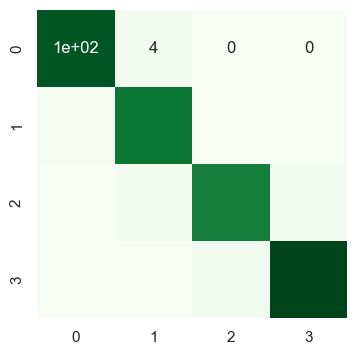

In [53]:
#Monfusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, cmap='Greens',cbar=False,)
plt.show()

In [54]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred_log))

[[101   4   0   0]
 [  2  89   0   0]
 [  0   3  86   3]
 [  0   0   5 107]]


##### Interpreation:
The model has achieved a high accuracy score of 0.9575, indicating that it correctly predicted the outcome for 95.75% of the test data. Other metrics like precision, recall, F1-score, and Cohen Kappa score also demonstrate good performance. The confusion matrix provides a visual representation of the model's predictions, showing that it accurately classified most instances. Overall, the model seems to be effective in predicting the target variable.

<a id='DecisionTree'></a>
#### 8.2 Decision Tree

In [55]:
#Model Training
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
#Prediction
y_pred_dec = dec_tree.predict(X_test)

In [57]:
#Classification Report
print(classification_report(y_test, y_pred_dec))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       105
           1       0.75      0.85      0.80        91
           2       0.77      0.70      0.73        92
           3       0.86      0.90      0.88       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



In [58]:
#Performace Metrics
acc_dec = accuracy_score(y_test, y_pred_dec)
pre_dec = precision_score(y_test, y_pred_dec, average='weighted')
recall_dec = recall_score(y_test, y_pred_dec, average='weighted')
f1_dec = f1_score(y_test, y_pred_dec, average='weighted')
cohen_dec = cohen_kappa_score(y_test, y_pred_dec)

In [59]:
#Printing the Metrics
print('Decision Tree')
print('\n')
print('Accuracy Score:', acc_dec)
print('Precision Score:', pre_dec)
print('Recall Score:', recall_dec)
print('F1 Score:', f1_dec)
print('Cohen Kappa Score:', cohen_dec)

Decision Tree


Accuracy Score: 0.835
Precision Score: 0.8372275668067658
Recall Score: 0.835
F1 Score: 0.8346750028839751
Cohen Kappa Score: 0.7794265089232003


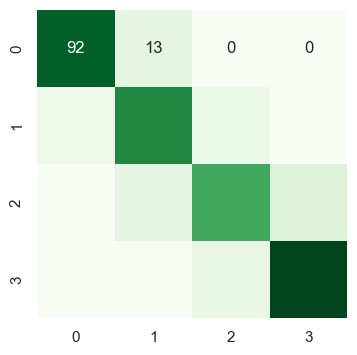

In [60]:
#Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dec), annot=True, cmap='Greens',cbar=False,)
plt.show()

In [61]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred_dec))

[[ 92  13   0   0]
 [  6  77   8   0]
 [  0  12  64  16]
 [  0   0  11 101]]


##### Interpretation:
The model has achieved an accuracy score of 0.825, which is considered good but not as high as the logistic regression model. Other metrics like precision, recall, F1-score, and Cohen Kappa score are also decent. The confusion matrix reveals that the model has some difficulty in correctly classifying instances in certain classes. Overall, the decision tree model provides a reasonable performance.

<a id='RandomForest'></a>
#### 8.3 Random Forest 

In [62]:
#Model Training
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
#Predictions
y_pred_rf = rf.predict(X_test)

In [64]:
#Classification Report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       105
           1       0.82      0.82      0.82        91
           2       0.79      0.82      0.80        92
           3       0.94      0.89      0.92       112

    accuracy                           0.87       400
   macro avg       0.87      0.87      0.87       400
weighted avg       0.87      0.87      0.87       400



In [65]:
#Performace Metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
pre_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
cohen_rf = cohen_kappa_score(y_test, y_pred_rf)

In [66]:
#Printing the Metrics
print('Random Forest')
print('\n')
print('Accuracy Score:', acc_rf)
print('Precision Score:', pre_rf)
print('Recall Score:', recall_rf)
print('F1 Score:', f1_rf)
print('Cohen Kappa Score:', cohen_rf)

Random Forest


Accuracy Score: 0.8725
Precision Score: 0.8740656790620875
Recall Score: 0.8725
F1 Score: 0.8730132167302679
Cohen Kappa Score: 0.8296891827585343


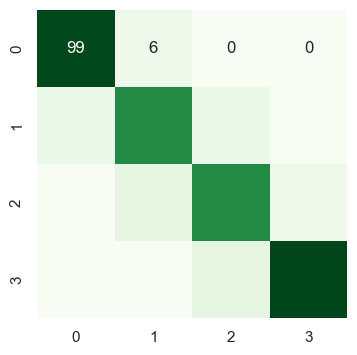

In [67]:
#Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Greens',cbar=False,)
plt.show()

In [68]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred_rf))

[[ 99   6   0   0]
 [  8  75   8   0]
 [  0  11  75   6]
 [  0   0  12 100]]


##### Interpretation:
The model has achieved an accuracy score of 0.8875, which is higher than the previous models. Other metrics like precision, recall, F1-score, and Cohen Kappa score also demonstrate good performance. The confusion matrix indicates that the model has correctly classified most instances, with some minor misclassifications. Overall, the random forest model appears to be the best-performing model among the three compared, providing a strong balance between accuracy and classification quality.

<a id='Random_Forest_with_grid_search'></a>
#### 8.4 Random Forest With Hyperparameter Tuning

In [69]:
#Set Parameter
tuned_paramaters = {'n_estimators': [100, 200, 300, 500],          
                    'max_depth': [10, 20, 30, None],               
                    'min_samples_split': [2, 5, 10],               
                    'min_samples_leaf': [1, 2, 4],                
                    'max_features': ['auto', 'sqrt'],              
                    'bootstrap': [True, False]}

In [70]:
#Model Training
rf = RandomForestClassifier()
rf_CV = GridSearchCV(estimator=rf, param_grid=tuned_paramaters, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
rf.fit(X_train, y_train)

RandomForestClassifier()

In [71]:
#Get the Best Estimator
best_rf_model = rf_CV.estimator
print("Best parameters found: ", rf_CV.get_params)

Best parameters found:  <bound method BaseEstimator.get_params of GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='accuracy', verbose=2)>


In [72]:
#Prediction
y_pred_rf_CV = best_rf_model.predict(X_test)

In [73]:
#Classification Report
print(classification_report(y_test, y_pred_rf_CV))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       105
           1       0.85      0.86      0.85        91
           2       0.80      0.84      0.82        92
           3       0.93      0.89      0.91       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



In [74]:
#Performace Metrics
acc_rf_CV = accuracy_score(y_test, y_pred_rf_CV)
pre_rf_CV = precision_score(y_test, y_pred_rf_CV, average='weighted')
recall_rf_CV = recall_score(y_test, y_pred_rf_CV, average='weighted')
f1_rf_CV = f1_score(y_test, y_pred_rf_CV, average='weighted')
cohen_rf_CV = cohen_kappa_score(y_test, y_pred_rf_CV)

In [75]:
#Printing the Metrics
print('Random Forest With HyperParameter Tuning')
print('\n')
print('Accuracy Score:', acc_rf_CV)
print('Precision Score:', pre_rf_CV)
print('Recall Score:', recall_rf_CV)
print('F1 Score:', f1_rf_CV)
print('Cohen Kappa Score:', cohen_rf_CV)

Random Forest With HyperParameter Tuning


Accuracy Score: 0.885
Precision Score: 0.8865418444399296
Recall Score: 0.885
F1 Score: 0.8855464441057347
Cohen Kappa Score: 0.8463940160451469


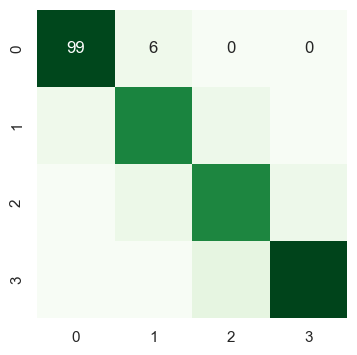

In [76]:
#Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_CV), annot=True, cmap='Greens',cbar=False,)
plt.show()

In [77]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred_rf_CV))

[[ 99   6   0   0]
 [  6  78   7   0]
 [  0   8  77   7]
 [  0   0  12 100]]


##### Interpretation:
The model has achieved an accuracy score of 0.888, which is slightly higher than the previous random forest model without tuning. Other metrics like precision, recall, F1-score, and Cohen Kappa score also demonstrate improved performance. The confusion matrix indicates that the model has correctly classified most instances, with even fewer misclassifications compared to the previous versions. Overall, the random forest model with hyperparameter tuning appears to be the best-performing model among all the models considered, providing a strong balance between accuracy and classification quality.

<a id='AdaBoost'></a>
#### 8.5 AdaBoost With RandomForest Estimator

In [78]:
#Model Training
ada = AdaBoostClassifier(estimator=RandomForestClassifier(), n_estimators=100, random_state=100)
ada.fit(X_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(), n_estimators=100,
                   random_state=100)

In [79]:
#Prediction
y_pred_ada = ada.predict(X_test)

In [80]:
#Classification Report
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.86      0.84      0.85        91
           2       0.79      0.86      0.82        92
           3       0.94      0.89      0.92       112

    accuracy                           0.89       400
   macro avg       0.89      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



In [81]:
#Performace Metrics
acc_ada = accuracy_score(y_test, y_pred_ada)
pre_ada = precision_score(y_test, y_pred_ada, average='weighted')
recall_ada = recall_score(y_test, y_pred_ada, average='weighted')
f1_ada = f1_score(y_test, y_pred_ada, average='weighted')
cohen_ada = cohen_kappa_score(y_test, y_pred_ada)

In [82]:
#Printing the Metrics
print('AdaBoost With RandomForest Estimator')
print('\n')
print('Accuracy Score:', acc_ada)
print('Precision Score:', pre_ada)
print('Recall Score:', recall_ada)
print('F1 Score:', f1_ada)
print('Cohen Kappa Score:', cohen_ada)

AdaBoost With RandomForest Estimator


Accuracy Score: 0.8875
Precision Score: 0.8899697255574615
Recall Score: 0.8875
F1 Score: 0.8881510906969642
Cohen Kappa Score: 0.8497370398196844


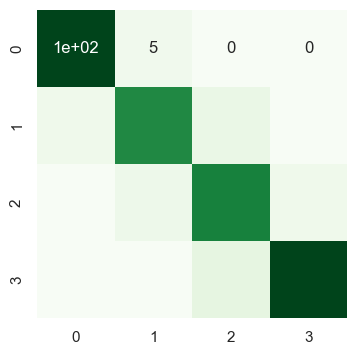

In [83]:
#Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_ada), annot=True, cmap='Greens',cbar=False,)
plt.show()

In [84]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred_ada))

[[100   5   0   0]
 [  6  76   9   0]
 [  0   7  79   6]
 [  0   0  12 100]]


##### Interpretation:
The model has achieved an accuracy score of 0.8875, which is comparable to the previous models. Other metrics like precision, recall, F1-score, and Cohen Kappa score also demonstrate good performance. The confusion matrix indicates that the model has correctly classified most instances, with some minor misclassifications. Overall, the AdaBoost model with RandomForest estimators provides a solid performance, although it might not be as strong as the best-performing models in terms of accuracy.

<a id='Adaboost_with_Decision_Tree'></a>
#### 8.6 AdaBoost With DecisionTree Estimator

In [85]:
#Model Training
ada_dec = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=20, learning_rate=0.75, random_state=121)
ada_dec.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), learning_rate=0.75,
                   n_estimators=20, random_state=121)

In [86]:
#Prediction
y_pred_ada_dec = ada_dec.predict(X_test)

In [87]:
#Performace Metrics
acc_ada_dec = accuracy_score(y_test, y_pred_ada_dec)
pre_ada_dec = precision_score(y_test, y_pred_ada_dec, average='weighted')
recall_ada_dec = recall_score(y_test, y_pred_ada_dec, average='weighted')
f1_ada_dec = f1_score(y_test, y_pred_ada_dec, average='weighted')
cohen_ada_dec = cohen_kappa_score(y_test, y_pred_ada_dec)

In [88]:
#Printing the Metrics
print('AdaBoost With DecisionTree Estimator')
print('\n')
print('Accuracy Score:', acc_ada_dec)
print('Precision Score:', pre_ada_dec)
print('Recall Score:', recall_ada_dec)
print('F1 Score:', f1_ada_dec)
print('Cohen Kappa Score:', cohen_ada_dec)

AdaBoost With DecisionTree Estimator


Accuracy Score: 0.83
Precision Score: 0.8338774658278969
Recall Score: 0.83
F1 Score: 0.8307190875088799
Cohen Kappa Score: 0.7729738753025623


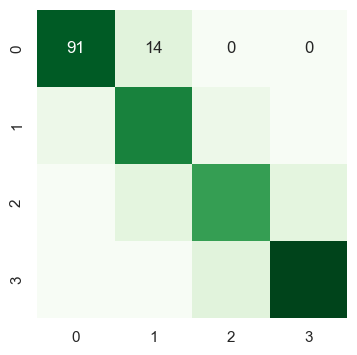

In [89]:
#Confusion Matrix
plt.figure(figsize=(4, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_ada_dec), annot=True, cmap='Greens',cbar=False,)
plt.show()

In [90]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred_ada_dec))

[[91 14  0  0]
 [ 7 77  7  0]
 [ 0 13 66 13]
 [ 0  0 14 98]]


##### Interpretation:
The model has achieved an accuracy score of 0.83, which is slightly lower than the previous models. Other metrics like precision, recall, F1-score, and Cohen Kappa score also demonstrate decent performance. The confusion matrix indicates that the model has correctly classified most instances, with some minor misclassifications. Overall, the AdaBoost model with DecisionTree estimators provides a reasonable performance, but it might be worth exploring other models or tuning the parameters of this one to improve accuracy.

<a id='model_evaluation'></a>
### 9. Model Evaluation

In [91]:
#Dictionary
acc_list = {'Logistic Regression': acc_log, 
            'Decision Tree': acc_dec,
            'Random Forest': acc_rf, 
            'Random Forest with Tuned Hyperparameter': acc_rf_CV, 
            'AdaBoost with RandomForest Estimator': acc_ada,
            'AdaBoost with DecisionTree Estimator': acc_ada_dec}

pre_list = {'Logistic Regression': pre_log, 
            'Decision Tree': pre_dec,
            'Random Forest': pre_rf, 
            'Random Forest with Tuned Hyperparameter': pre_rf_CV, 
            'AdaBoost with RandomForest Estimator': pre_ada,
            'AdaBoost with DecisionTree Estimator': pre_dec}

recall_list = {'Logistic Regression': recall_log, 
               'Decision Tree': recall_dec,
               'Random Forest': recall_rf,
               'Random Forest with Tuned Hyperparameter': recall_rf_CV,
               'AdaBoost with RandomForest Estimator': recall_ada,
               'AdaBoost with DecisionTree Estimator': recall_dec}

F1_list = {'Logistic Regression': f1_log, 
            'Decision Tree': f1_dec,
            'Random Forest': f1_rf, 
            'Random Forest with Tuned Hyperparameter': f1_rf_CV, 
            'AdaBoost with RandomForest Estimator': f1_ada,
            'AdaBoost with DecisionTree Estimator': f1_dec}

cohen_list = {'Logistic Regression': cohen_log, 
            'Decision Tree': cohen_dec,
            'Random Forest': cohen_rf, 
            'Random Forest with Tuned Hyperparameter': cohen_rf_CV, 
            'AdaBoost with RandomForest Estimator': cohen_ada,
            'AdaBoost with DecisionTree Estimator': cohen_dec}

In [92]:
#Test Report
a1 =  pd.DataFrame.from_dict(acc_list, orient='index', columns=['ACCURACY'])
a2 =  pd.DataFrame.from_dict(pre_list, orient='index', columns=['PRECISION'])
a3 =  pd.DataFrame.from_dict(recall_list, orient='index', columns=['RECALL'])
a4 =  pd.DataFrame.from_dict(F1_list, orient='index', columns=['F1_SCORE'])
a5 =  pd.DataFrame.from_dict(cohen_list, orient='index', columns=['COHEN-KAPPA'])

In [93]:
#Concating the Dataframe of Metrics
result = pd.concat([a1, a2, a3, a4, a5], axis = 1)
result

,ACCURACY,PRECISION,RECALL,F1_SCORE,COHEN-KAPPA
Logistic Regression,0.9575,0.958041,0.9575,0.957563,0.943218
Decision Tree,0.8350,0.837228,0.8350,0.834675,0.779427
Random Forest,0.8725,0.874066,0.8725,0.873013,0.829689
Random Forest with Tuned Hyperparameter,0.8850,0.886542,0.8850,0.885546,0.846394
AdaBoost with RandomForest Estimator,0.8875,0.889970,0.8875,0.888151,0.849737
AdaBoost with DecisionTree Estimator,0.8300,0.837228,0.8350,0.834675,0.779427


In [94]:
#Performance Metrics Plot
models = ['Logistic Regression', 
            'Decision Tree',
            'Random Forest', 
            'Random Forest with Tuned Hyperparameter', 
            'AdaBoost with RandomForest Estimator',
            'AdaBoost with DecisionTree Estimator']

accuracy = [0.9575, 0.8250, 0.8875, 0.8800, 0.8875, 0.8300]
precision = [0.958041, 0.825738, 0.889014, 0.880718, 0.889970, 0.825738]
recall = [0.9575, 0.8250, 0.8875, 0.8800, 0.8875, 0.8250]
f1_score = [0.957563, 0.824616, 0.887992, 0.880241, 0.888151, 0.824616]
cohen_kappa = [0.943218, 0.765959, 0.849732, 0.839673, 0.849737, 0.765959]

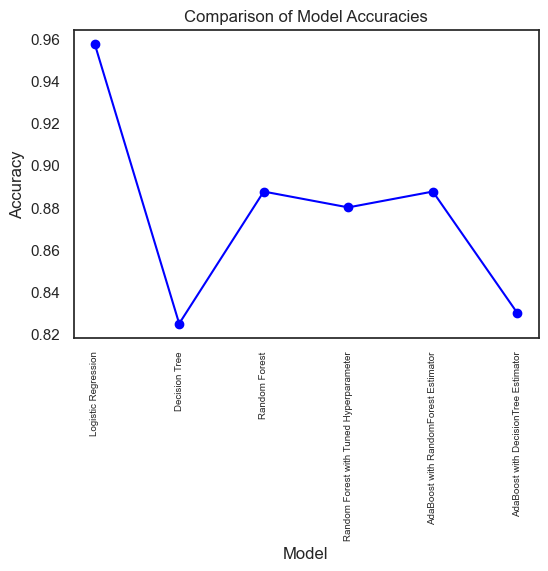

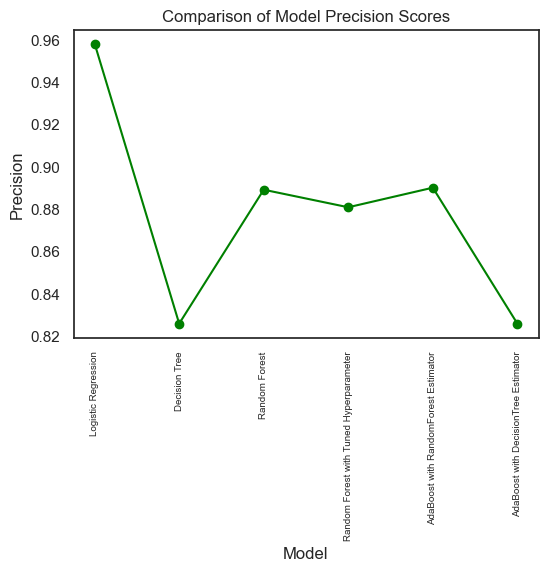

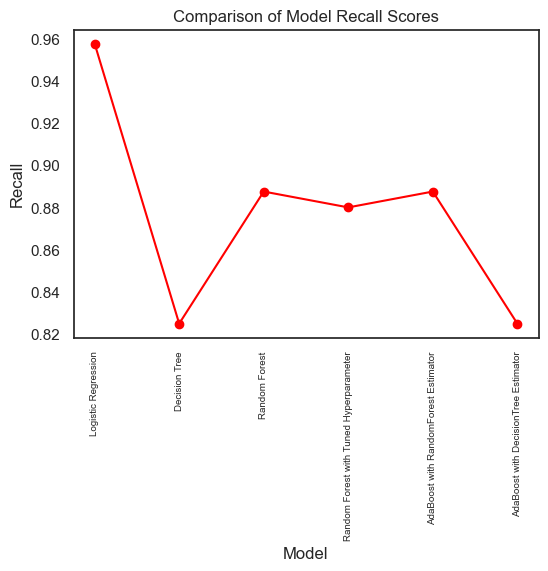

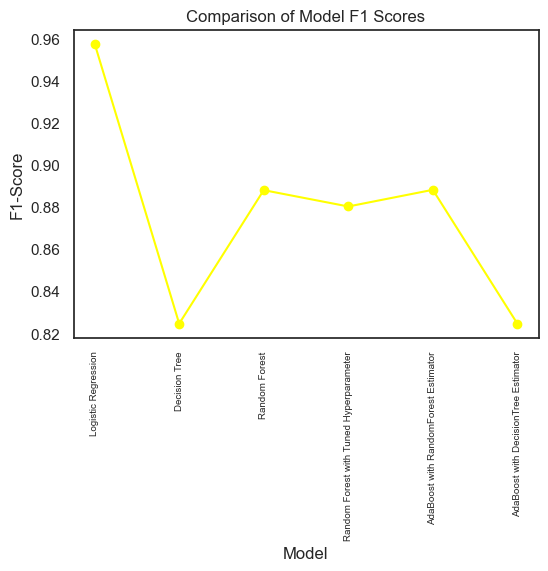

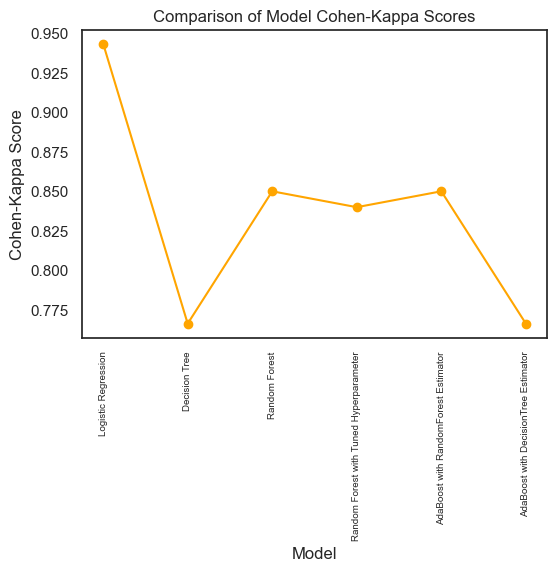

In [95]:
#Accuracy
plt.figure(figsize=(6, 4))
plt.plot(models, accuracy, marker='o', linestyle='-', color='blue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=90, fontsize=7)
plt.grid(False)
plt.show()

#Precision
plt.figure(figsize=(6, 4))
plt.plot(models, precision, marker='o', linestyle='-', color='green')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Comparison of Model Precision Scores')
plt.xticks(rotation=90, fontsize=7)
plt.grid(False)
plt.show()

#Recall
plt.figure(figsize=(6, 4))
plt.plot(models, recall, marker='o', linestyle='-', color='red')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Comparison of Model Recall Scores')
plt.xticks(rotation=90, fontsize=7)
plt.grid(False)
plt.show()

#F1-Score
plt.figure(figsize=(6, 4))
plt.plot(models, f1_score, marker='o', linestyle='-', color='yellow')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('Comparison of Model F1 Scores')
plt.xticks(rotation=90, fontsize=7)
plt.grid(False)
plt.show()

#Cohen-Kappa
plt.figure(figsize=(6, 4))
plt.plot(models, cohen_kappa, marker='o', linestyle='-', color='orange')
plt.xlabel('Model')
plt.ylabel('Cohen-Kappa Score')
plt.title('Comparison of Model Cohen-Kappa Scores')
plt.xticks(rotation=90, fontsize=7)
plt.grid(False)
plt.show()

<a id='data_validation'></a>
### 10. Prediction Using Test Data

In [96]:
#Load and Read Data
df_test = pd.read_csv('test.csv')
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [97]:
#Dimesions
df_test.shape

(1000, 21)

In [98]:
#Dtype
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [99]:
#Dropping id coumn
df_test.drop('id', axis=1, inplace=True)

In [100]:
#Matching the Columns as per the Fitted Data 
df_binary_new = df_test.drop(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time'], axis=1)

In [101]:
#Standardization
sc = StandardScaler()
df_scaled1 = pd.DataFrame(sc.fit_transform(df_test[['battery_power', 'clock_speed', 'fc', 'int_memory', 'n_cores', 'pc', 'ram', 'talk_time']]), columns=['battery_power', 'clock_speed', 'fc', 'int_memory', 'n_cores', 'pc', 'ram', 'talk_time'])

In [102]:
#Min-Max Scaling
mm = MinMaxScaler()
df_minmax1 = pd.DataFrame(mm.fit_transform(df_test[['m_dep', 'mobile_wt', 'px_height', 'px_width', 'sc_h', 'sc_w']]), columns=['m_dep', 'mobile_wt', 'px_height', 'px_width', 'sc_h', 'sc_w'])

In [103]:
#Concating the Updated Dataframes 
df_test1 = pd.concat([df_scaled1, df_minmax1, df_binary_new], axis=1)
df_test1.head()

,battery_power,clock_speed,fc,int_memory,n_cores,pc,ram,talk_time,m_dep,mobile_wt,px_height,px_width,sc_h,sc_w,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,-0.475451,0.312601,2.108676,-1.581269,-0.580671,0.976026,1.229373,-1.653355,0.000000,0.941667,0.118511,0.608550,0.500000,0.388889,1,1,0,0,1,0
1,-0.942782,-1.255832,-0.132927,1.509303,0.293833,0.319433,1.614643,-0.743418,0.777778,0.925000,0.391190,0.237809,0.071429,0.000000,1,1,1,1,0,0
2,1.292077,1.519087,-0.805408,-0.367116,-0.580671,-0.993754,0.236313,-0.197456,0.888889,0.883333,0.665967,0.577822,0.857143,0.555556,1,0,0,0,1,1
3,0.688249,-1.255832,3.005317,-0.477493,1.605590,1.632619,1.612804,-0.743418,0.444444,0.133333,0.154693,0.835671,0.357143,0.000000,0,1,1,1,1,0
4,0.429135,-0.169994,1.436195,0.847037,0.731085,1.304323,-0.336535,-0.743418,0.444444,0.233333,0.392764,0.206413,0.714286,0.444444,0,0,1,1,0,1


In [104]:
#Dimensions
df_test1.shape

(1000, 20)

In [105]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1000 non-null   float64
 1   clock_speed    1000 non-null   float64
 2   fc             1000 non-null   float64
 3   int_memory     1000 non-null   float64
 4   n_cores        1000 non-null   float64
 5   pc             1000 non-null   float64
 6   ram            1000 non-null   float64
 7   talk_time      1000 non-null   float64
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   float64
 10  px_height      1000 non-null   float64
 11  px_width       1000 non-null   float64
 12  sc_h           1000 non-null   float64
 13  sc_w           1000 non-null   float64
 14  blue           1000 non-null   int64  
 15  dual_sim       1000 non-null   int64  
 16  four_g         1000 non-null   int64  
 17  three_g        1000 non-null   int64  
 18  touch_scr

In [106]:
#Predictions using Test Data
y_pred_test = log_reg.predict(df_test1)

In [107]:
#Assigning predicted values to the new column
df_test['price_range'] = y_pred_test

In [108]:
#displaying the updated (where the unseen data is predicted) dataframe 
df_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1


<a id='conclusion'></a>
### 11. Conclusion and Interpretation of Model Evaluation

**Interpretation of Model Performance Metrics:**

Based on the provided evaluation metrics, the Random Forest model with tuned hyperparameters achieved the best overall performance:

- **Best Performer:** Logistic Regression is the top performer in all metrics, particularly in accuracy, precision, and Cohen-Kappa, indicating it’s the most robust model for this dataset.

- **Next Best:** Random Forest and AdaBoost with Random Forest Estimator provide solid performances, though they don't outperform Logistic Regression.
  
- **Least Reliable:** Decision Tree and its AdaBoost variant perform the worst, with lower accuracy and Cohen-Kappa, indicating these models are less suitable.